In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import gmaps
import os
import json

# Google developer API key
#from config import gkey

# Configure gmaps
#gmaps.configure(api_key=gkey)

url = "https://data.cityofchicago.org/resource/ijzp-q8t2.json"

crimes = requests.get(url).json()


In [2]:
years = []
lat = []
lon = []
crime_types = []
date = []
for crime in crimes:
    years.append(crime['year'])
    crime_types.append(crime['primary_type'])
    date.append(crime['date'])
    try:
        lat.append(crime['latitude'])
        lon.append(crime['longitude'])
    except KeyError:
        lat.append(np.nan)
        lon.append(np.nan)


In [3]:
chicago_crime_2020 = pd.DataFrame({
    "Crime": crime_types,
    "Date": date,
    "Latitude": lat,
    "Longitude": lon
})
chicago_crime_2020['Latitude'] = pd.to_numeric(chicago_crime_2020['Latitude'], errors='coerce')
chicago_crime_2020['Longitude'] = pd.to_numeric(chicago_crime_2020['Longitude'], errors='coerce')
chicago_crime_2020.dtypes

Crime         object
Date          object
Latitude     float64
Longitude    float64
dtype: object

In [4]:
chicago_crime_2020

,Crime,Date,Latitude,Longitude
0,THEFT,2020-04-05T23:50:00.000,41.909396,-87.763988
1,BATTERY,2020-04-05T23:45:00.000,41.899200,-87.770411
2,THEFT,2020-04-05T23:40:00.000,41.864034,-87.717792
3,THEFT,2020-04-05T23:35:00.000,41.915730,-87.746057
4,ASSAULT,2020-04-05T23:34:00.000,41.808833,-87.622824
...,...,...,...,...
995,WEAPONS VIOLATION,2020-04-03T15:18:00.000,41.844593,-87.700964
996,BATTERY,2020-04-03T15:15:00.000,41.878391,-87.761230
997,THEFT,2020-04-03T15:15:00.000,41.803192,-87.601577
998,ASSAULT,2020-04-03T15:07:00.000,41.748699,-87.606378


In [5]:
#Count crime types
chicago_crime_type_df = pd.DataFrame({
    'Crime Types': {
        'Assault': crime_types.count('ASSAULT'),
        'Battery': crime_types.count('BATTERY'),
        'Burglary': crime_types.count('BURGLARY'),
        'Criminal Damage': crime_types.count('CRIMINAL DAMAGE'),
        'Grand Theft Auto': crime_types.count('MOTOR VEHICLE THEFT'),
        'Robbery': crime_types.count('ROBBERY'),
        'Theft': crime_types.count('THEFT'),
        'Weapons Violation': crime_types.count('WEAPONS VIOLATION')
    }
})

chicago_crime_types = chicago_crime_type_df['Crime Types']
chicago_crime_types

Assault               96
Battery              251
Burglary              29
Criminal Damage      156
Grand Theft Auto      45
Robbery               51
Theft                167
Weapons Violation     55
Name: Crime Types, dtype: int64

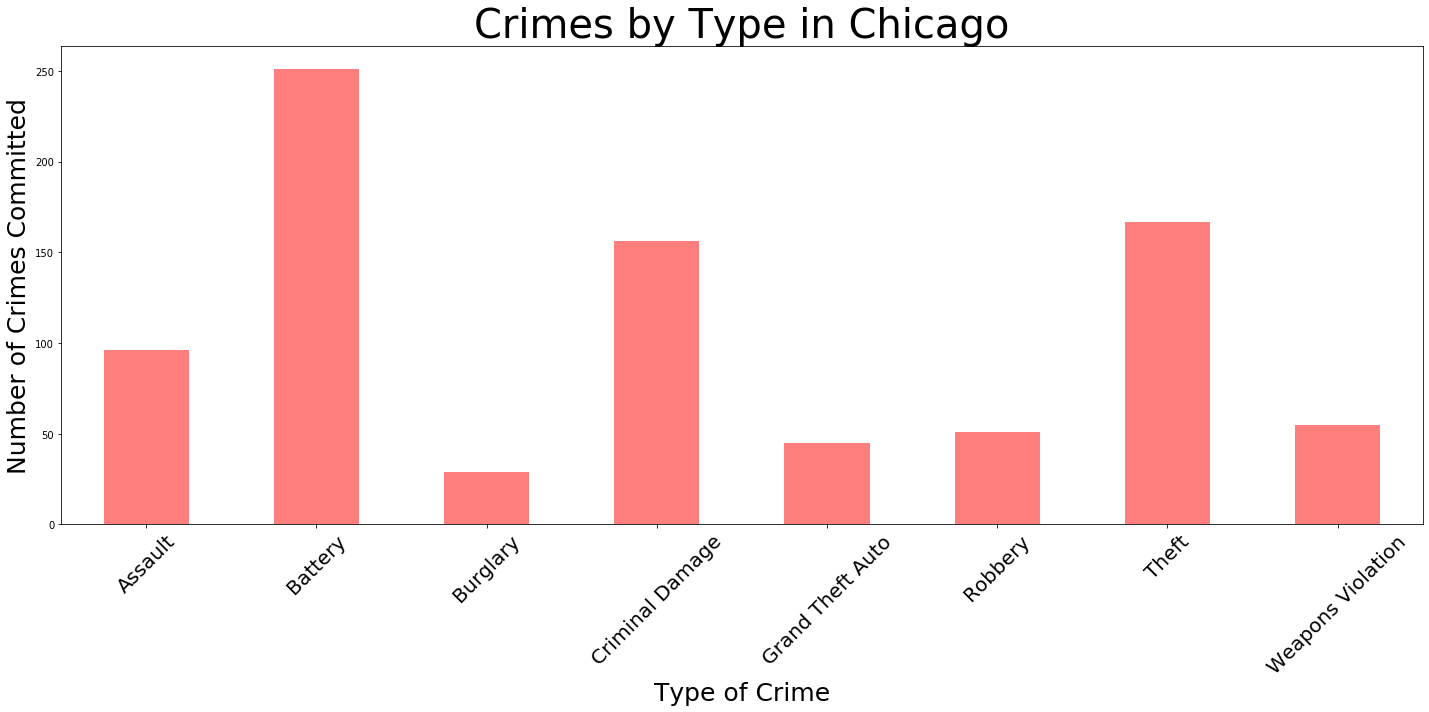

In [8]:
chicago_crime_types.plot(kind="bar", facecolor="red", alpha=.5,figsize=(20,10))
plt.title("Crimes by Type in Chicago",fontsize=40)
plt.ylabel("Number of Crimes Committed",fontsize=25)
plt.xlabel("Type of Crime",fontsize=25)
plt.xticks(fontsize=20,rotation=45)
plt.tight_layout()
